# 라이브러리 불러오기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier

#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [2]:
# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기

In [4]:
data = pd.read_csv('df_final3.csv')
df = data.copy() #원본 데이터

In [5]:
print(df.shape)
display(df.head())
display(df.tail())
print(df.info())

(864747, 44)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,17,1997-02-28,1997,...,1999,2,1999-02-01,7.75,0,0.172105,0.118196,0.055178,1,1
1,1000935004,Hairline Inc.,Vancouver,WA,98663,WELLS FARGO BANK NATL ASSOC,SD,14,1997-04-08,1997,...,1999,2,1999-02-01,7.75,0,0.090095,0.134566,0.055910,3,2
2,1003535008,Jason A. Philbrook,Rockland,ME,4841,KEYBANK NATIONAL ASSOCIATION,OH,18,1999-01-11,1999,...,1999,2,1999-02-01,7.75,0,0.041237,0.213874,0.051896,5,2
3,1009994000,"ARROW ENTERPRISE, INC.",BILLINGS,MT,59101,WESTERN SECURITY BANK,MT,5,1997-03-04,1997,...,1999,2,1999-02-01,7.75,0,0.148380,0.209033,0.057460,3,1
4,1011904005,"ROBIN E. JONES, D.D.S.",TACOMA,WA,98404,KEYBANK NATIONAL ASSOCIATION,OR,8,1997-03-05,1997,...,1999,2,1999-02-01,7.75,0,0.094218,0.134566,0.055910,3,2


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
864742,9022713002,"BJORK, LAURA BEAUTY CONSULTANT",DALE CITY,VA,22193,MANUFACTURERS & TRADERS TR CO,MD,1,1996-02-21,1996,...,1996,2,1996-02-01,8.25,0,0.104331,0.139452,0.056099,3,1
864743,9035193000,"PROFESSIONALS FOR NONPROFITS,I",NEW YORK,NY,10022,BANCO POPULAR NORTH AMERICA,NY,10,1996-02-26,1996,...,1996,2,1996-02-01,8.25,0,0.094630,0.103363,0.066158,3,1
864744,9256453010,NORTHAIRE MARKET INC,SHAKOPEE,MN,55379,FIDELITY BANK,MN,20,1996-05-07,1996,...,1996,2,1996-02-01,8.25,0,0.066200,0.133574,0.063179,3,2
864745,9459933001,COMPUTER RENAISSANCE,CARY,NC,27511,FIRST-CITIZENS BK & TR CO,NC,17,1996-08-15,1996,...,1996,2,1996-02-01,8.25,0,0.187560,0.111641,0.060808,1,1
864746,7377094002,NORTHLAND DATACOMM CO,MINNEAPOLIS,MN,55311,BMO HARRIS BK NATL ASSOC,IL,20,2004-04-22,2004,...,2014,12,2014-12-01,3.25,0,0.066200,0.133574,0.063179,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864747 entries, 0 to 864746
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      864747 non-null  int64  
 1   Name               864747 non-null  object 
 2   City               864747 non-null  object 
 3   State              864747 non-null  object 
 4   Zip                864747 non-null  int64  
 5   Bank               864747 non-null  object 
 6   BankState          864747 non-null  object 
 7   NAICS              864747 non-null  int64  
 8   ApprovalDate       864747 non-null  object 
 9   ApprovalFY         864747 non-null  int64  
 10  Term               864747 non-null  int64  
 11  NoEmp              864747 non-null  int64  
 12  NewExist           864747 non-null  int64  
 13  CreateJob          864747 non-null  int64  
 14  RetainedJob        864747 non-null  int64  
 15  FranchiseCode      864747 non-null  int64  
 16  Ur

# 2차 전처리

## 1. 변수 선택

In [6]:
#필요없는 열은 제거
df = df.drop(["LoanNr_ChkDgt","Name","City","State","Zip","Bank","BankState","ApprovalDate","ApprovalFY","Term","CreateJob","RetainedJob","ChgOffDate","DisbursementDate","DisbursementGross","ChgOffPrinGr","ChgOffDate2","Year","Month","DATE","Density","Upper_Threshold","Lower_Threshold","Label"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864747 entries, 0 to 864746
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NAICS             864747 non-null  int64  
 1   NoEmp             864747 non-null  int64  
 2   NewExist          864747 non-null  int64  
 3   FranchiseCode     864747 non-null  int64  
 4   UrbanRural        864747 non-null  int64  
 5   LowDoc            864747 non-null  int64  
 6   MIS_Status        864747 non-null  int64  
 7   GrAppv            864747 non-null  int64  
 8   SBA_Appv          864747 non-null  int64  
 9   SameState         864747 non-null  int64  
 10  Recession         864747 non-null  int64  
 11  Term_re           864747 non-null  int64  
 12  smallmedium       864747 non-null  int64  
 13  createjob2        864747 non-null  int64  
 14  retainedjob2      864747 non-null  int64  
 15  dis_re            864747 non-null  int64  
 16  appv_pct          86

# 2. train, valid, test 셋 만들기

### 2.1 test 셋 만들기

In [7]:
# 시드 고정
seed = 42
df_sample = df.sample(n=10000, random_state=seed)

# 샘플 데이터 확인
print(df_sample.head())

# 필요하다면 test 데이터 프레임으로 할당
test = df_sample

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  MIS_Status  \
825107     13      4         0              0           0       0           0   
212849      8     16         0              0           0       0           0   
724805      3      1         1              0           1       0           0   
525131      1      7         1              0           1       0           0   
256633     10     52         0              0           0       0           0   

         GrAppv  SBA_Appv  SameState  Recession  Term_re  smallmedium  \
825107   306000    229500          1          0        2            0   
212849   517000    387750          1          0        2            0   
724805   338400    287640          0          0        1            0   
525131   175300    131475          1          0        1            0   
256633  1185000    749986          0          0        1            0   

        createjob2  retainedjob2  dis_re   appv_pct  DPRIME  dprime2  \
82

In [8]:
# test 데이터 구조 확인
print(test.shape)
display(test.head())
display(test.tail())
print(test.info())

(10000, 20)


,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,SameState,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
825107,13,4,0,0,0,0,0,306000,229500,1,0,2,0,0,0,3,75.000000,8.50,0,2
212849,8,16,0,0,0,0,0,517000,387750,1,0,2,0,0,0,4,75.000000,4.75,0,2
724805,3,1,1,0,1,0,0,338400,287640,0,0,1,0,0,0,3,85.000000,6.00,0,2
525131,1,7,1,0,1,0,0,175300,131475,1,0,1,0,1,0,3,75.000000,8.25,0,1
256633,10,52,0,0,0,0,0,1185000,749986,0,0,1,0,0,2,5,63.289958,8.50,0,1


,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,SameState,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
697697,2,2,0,0,1,0,0,25000,22500,1,0,1,0,0,0,1,90.0,10.50,1,2
846983,17,1,1,0,0,0,0,85000,68000,1,0,1,0,0,0,2,80.0,8.25,0,1
352162,5,4,0,0,1,0,0,70000,35000,0,0,1,0,0,1,3,50.0,6.25,0,1
671962,13,20,0,0,0,0,0,169000,169000,1,0,2,0,1,1,3,100.0,8.51,0,2
833943,17,1,0,0,1,1,0,85000,73100,1,0,1,0,0,0,2,86.0,9.00,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 825107 to 833943
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAICS             10000 non-null  int64  
 1   NoEmp             10000 non-null  int64  
 2   NewExist          10000 non-null  int64  
 3   FranchiseCode     10000 non-null  int64  
 4   UrbanRural        10000 non-null  int64  
 5   LowDoc            10000 non-null  int64  
 6   MIS_Status        10000 non-null  int64  
 7   GrAppv            10000 non-null  int64  
 8   SBA_Appv          10000 non-null  int64  
 9   SameState         10000 non-null  int64  
 10  Recession         10000 non-null  int64  
 11  Term_re           10000 non-null  int64  
 12  smallmedium       10000 non-null  int64  
 13  createjob2        10000 non-null  int64  
 14  retainedjob2      10000 non-null  int64  
 15  dis_re            10000 non-null  int64  
 16  appv_pct          10000 non-null  

In [9]:
# y_test에 MIS_Status 열 할당
y_test = test['MIS_Status']

# x_test에 MIS_Status를 제외한 열들 할당
x_test = test.drop('MIS_Status', axis=1)

# x_test 확인
print(x_test.head())

# y_test 확인
print(y_test.head())

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc   GrAppv  \
825107     13      4         0              0           0       0   306000   
212849      8     16         0              0           0       0   517000   
724805      3      1         1              0           1       0   338400   
525131      1      7         1              0           1       0   175300   
256633     10     52         0              0           0       0  1185000   

        SBA_Appv  SameState  Recession  Term_re  smallmedium  createjob2  \
825107    229500          1          0        2            0           0   
212849    387750          1          0        2            0           0   
724805    287640          0          0        1            0           0   
525131    131475          1          0        1            0           1   
256633    749986          0          0        1            0           0   

        retainedjob2  dis_re   appv_pct  DPRIME  dprime2  growth_potential

### 2.2 샘플링
채무이행 : 채무불이행 = 5:5

In [10]:
# 시드 고정
seed = 42
# df에서 test 데이터를 제외한 데이터를 추출
df_remaining = df.drop(test.index)

# MIS_Status가 0인 데이터와 1인 데이터로 분리
df_0 = df_remaining[df_remaining['MIS_Status'] == 0]
df_1 = df_remaining[df_remaining['MIS_Status'] == 1]

# 0과 1의 비율 계산
ratio_0 = len(df_0) / len(df_remaining)
ratio_1 = len(df_1) / len(df_remaining)

# 다운 샘플링할 데이터 개수 계산
total_samples = 90000
samples_0 = int(total_samples * 0.5)  # MIS_Status가 0인 샘플 개수
samples_1 = int(total_samples * 0.5)  # MIS_Status가 1인 샘플 개수

# 비율 조정을 위한 다운 샘플링
df_0_downsampled = df_0.sample(n=samples_0, random_state=seed)
df_1_downsampled = df_1.sample(n=samples_1, random_state=seed)

# 다운 샘플링된 데이터 합치기
df_downsampled = pd.concat([df_0_downsampled, df_1_downsampled])

# 결과 데이터프레임 확인
print(df_downsampled['MIS_Status'].value_counts())

# 최종 데이터프레임 할당
df_fin = df_downsampled
df_fin

1    45000
0    45000
Name: MIS_Status, dtype: int64


,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,SameState,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
134344,8,3,0,0,0,0,0,230000,230000,1,0,2,0,0,0,2,100.00,8.12,0,2
755318,17,1,0,0,0,0,0,195000,156000,0,0,1,0,0,0,3,80.00,6.50,0,1
714626,1,24,0,0,0,0,0,1650000,749925,1,0,1,0,0,0,5,45.45,10.00,0,1
566872,14,2,0,0,1,0,0,525000,393750,0,0,1,0,0,0,4,75.00,7.26,0,2
284884,10,4,1,0,1,0,0,40000,34000,1,0,1,0,0,0,1,85.00,4.75,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550128,7,1,1,0,1,0,1,5000,4250,0,0,1,0,0,0,0,85.00,8.25,0,2
333630,18,3,0,0,0,0,1,30000,15000,0,0,0,0,0,0,1,50.00,4.25,0,2
493699,14,1,0,0,0,0,1,30000,15000,0,0,0,0,0,0,2,50.00,4.25,0,2
370638,5,11,0,0,1,0,1,248000,124000,0,0,0,0,0,1,3,50.00,4.01,0,1


### train, valid 셋 만들기

In [11]:
# train 데이터와 valid 데이터를 분할
df_train, df_valid = train_test_split(df_fin, train_size=70000, test_size=20000, random_state=42)

# 결과 확인
print("Train 데이터 비율:")
print(df_train['MIS_Status'].value_counts(normalize=True))
print("\nValid 데이터 비율:")
print(df_valid['MIS_Status'].value_counts(normalize=True))

Train 데이터 비율:
1    0.500457
0    0.499543
Name: MIS_Status, dtype: float64

Valid 데이터 비율:
0    0.5016
1    0.4984
Name: MIS_Status, dtype: float64


In [12]:
# df_train 분리
y_train = df_train['MIS_Status']
x_train = df_train.drop('MIS_Status', axis=1)

# x_train, y_train 확인
print(x_train.head())
print(y_train.head())

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  GrAppv  \
315027     20      2         0              0           0       0   20000   
377920     17     20         1              0           1       1  130500   
578704     14      1         0              0           1       0   15000   
509603      5     12         0              0           1       0   25000   
827228     10      3         0              0           1       1   36000   

        SBA_Appv  SameState  Recession  Term_re  smallmedium  createjob2  \
315027     10000          0          0        0            0           0   
377920    110925          1          0        0            0           0   
578704      7500          0          0        0            0           0   
509603     12500          1          0        1            0           0   
827228     28800          0          0        0            0           0   

        retainedjob2  dis_re  appv_pct  DPRIME  dprime2  growth_potential  
3150

In [13]:
# df_valid 분리
y_valid = df_valid['MIS_Status']
x_valid = df_valid.drop('MIS_Status', axis=1)

# x_valid, y_valid 확인
print(x_valid.head())
print(y_valid.head())

        NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  GrAppv  \
547801      6      1         1              0           0       0    4500   
168477     10      4         0              0           1       0   20000   
385262     10     12         1              0           0       0   40000   
672193      5      5         0              0           1       0  146000   
378324     10      3         0              0           1       0   35000   

        SBA_Appv  SameState  Recession  Term_re  smallmedium  createjob2  \
547801      2250          0          0        0            0           0   
168477     16400          0          0        1            0           0   
385262     20000          0          0        0            0           0   
672193    129940          0          0        2            0           0   
378324     17500          0          0        0            0           1   

        retainedjob2  dis_re  appv_pct  DPRIME  dprime2  growth_potential  
5478

# 3. 모델링

# 로지스틱 회귀

In [14]:
# 모델 선언
lg_model = LogisticRegression(random_state=42)

In [15]:
# 모델 학습
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [16]:
# 모델 평가
def model_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))
    print(classification_report(y_test, y_pred, labels=[True, False]))

In [17]:
pred=lg_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[7722 2246]
 [5268 4764]]

정확도: 0.6243
정밀도: 0.5945
재현율: 0.7747
F1: 0.6727
              precision    recall  f1-score   support

        True       0.59      0.77      0.67      9968
       False       0.68      0.47      0.56     10032

    accuracy                           0.62     20000
   macro avg       0.64      0.62      0.62     20000
weighted avg       0.64      0.62      0.62     20000



# 하이퍼파라미터 튜닝


    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # 규제 강도를 조절하는 역수. 클수록 약한 규제.
    'penalty': ['l1', 'l2'],                    # 규제 유형. 'l1'은 L1 규제, 'l2'는 L2 규제.
    'solver': ['liblinear', 'saga'],            # 최적화에 사용할 알고리즘.
    'max_iter': [100, 200, 300]                 # 최대 반복 횟수.
    

In [18]:
#모델 정의
ms_model = LogisticRegression(random_state=42, C=10, penalty='l1', solver='saga', max_iter=300)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[5767 4201]
 [3320 6712]]

정확도: 0.6240
정밀도: 0.6346
재현율: 0.5786
F1: 0.6053
              precision    recall  f1-score   support

        True       0.63      0.58      0.61      9968
       False       0.62      0.67      0.64     10032

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



=> 오히려 기본 모델보다 성능이 낮게 나옴.

# 랜덤 포레스트

In [19]:
# 모델 선언
rf_model = RandomForestClassifier(random_state=42)

In [20]:
# 모델 학습
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
pred=rf_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[7538 2430]
 [2014 8018]]

정확도: 0.7778
정밀도: 0.7892
재현율: 0.7562
F1: 0.7723
              precision    recall  f1-score   support

        True       0.79      0.76      0.77      9968
       False       0.77      0.80      0.78     10032

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



# 하이퍼파라미터 튜닝


    'n_estimators': [50, 100, 150],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],   # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],   # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]      # 리프 노드에 필요한 최소 샘플 수


In [32]:
#모델 정의
ms_model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=30, min_samples_split=5, min_samples_leaf=4)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[7611 2357]
 [1861 8171]]

정확도: 0.7891
정밀도: 0.8035
재현율: 0.7635
F1: 0.7830
              precision    recall  f1-score   support

        True       0.80      0.76      0.78      9968
       False       0.78      0.81      0.79     10032

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



# 변수 중요도

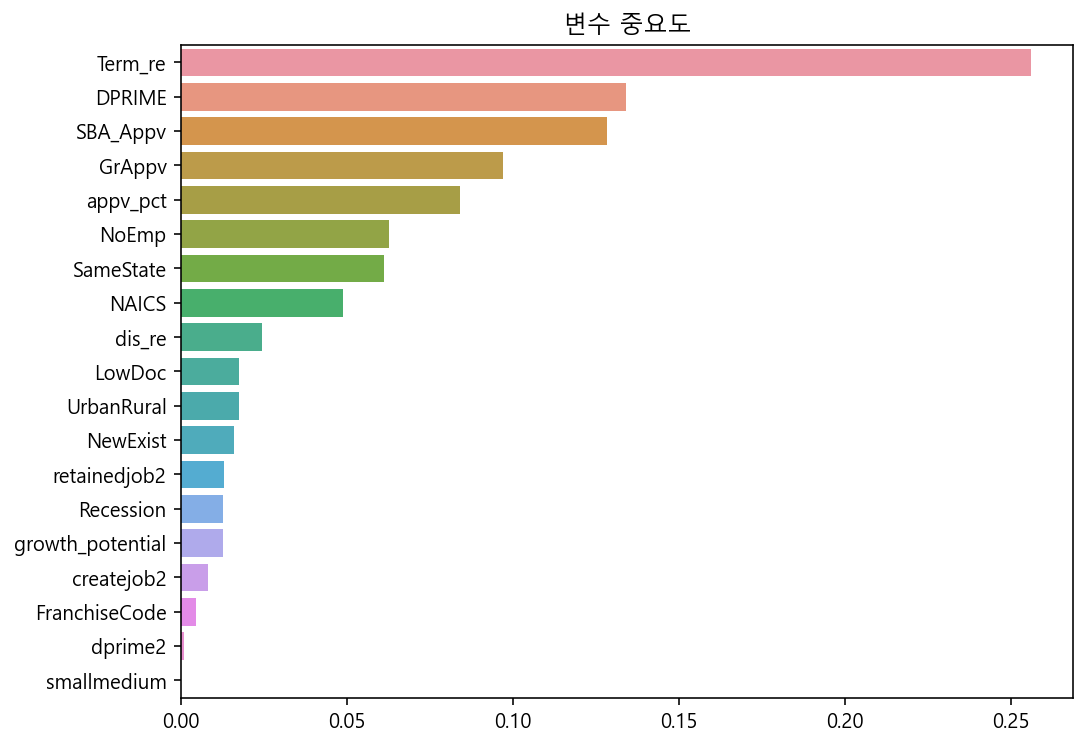

In [33]:
# 변수 중요도 계산

importances_values = pd.Series(ms_model.feature_importances_, index=x_valid.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('변수 중요도')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

# SVM

In [24]:
# 모델 선언
svm_model = svm.SVC(random_state=42)

In [25]:
# 모델 학습
svm_model.fit(x_train, y_train)

SVC(random_state=42)

In [26]:
pred=svm_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[6992 2976]
 [3895 6137]]

정확도: 0.6564
정밀도: 0.6422
재현율: 0.7014
F1: 0.6705
              precision    recall  f1-score   support

        True       0.64      0.70      0.67      9968
       False       0.67      0.61      0.64     10032

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000



# XGBoost

In [27]:
# 모델 선언
xg_model = XGBClassifier(random_state=42)

In [28]:
# 모델 학습
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
# 모델 평가
pred=xg_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[7722 2246]
 [1957 8075]]

정확도: 0.7899
정밀도: 0.7978
재현율: 0.7747
F1: 0.7861
              precision    recall  f1-score   support

        True       0.80      0.77      0.79      9968
       False       0.78      0.80      0.79     10032

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



# 하이퍼파라미터 튜닝

In [30]:
#모델 정의
ms_model = XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=0.9,
                        gamma=0, reg_alpha=0, reg_lambda=0)

# 모델 학습
ms_model.fit(x_train, y_train)

# 모델 평가
pred = ms_model.predict(x_valid)
model_eval(y_valid, pred)

오차행렬:
 [[7592 2376]
 [1982 8050]]

정확도: 0.7821
정밀도: 0.7930
재현율: 0.7616
F1: 0.7770
              precision    recall  f1-score   support

        True       0.79      0.76      0.78      9968
       False       0.77      0.80      0.79     10032

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



=> 오히려 기본 모델보다 성능이 낮게 나옴!

# 변수 중요도

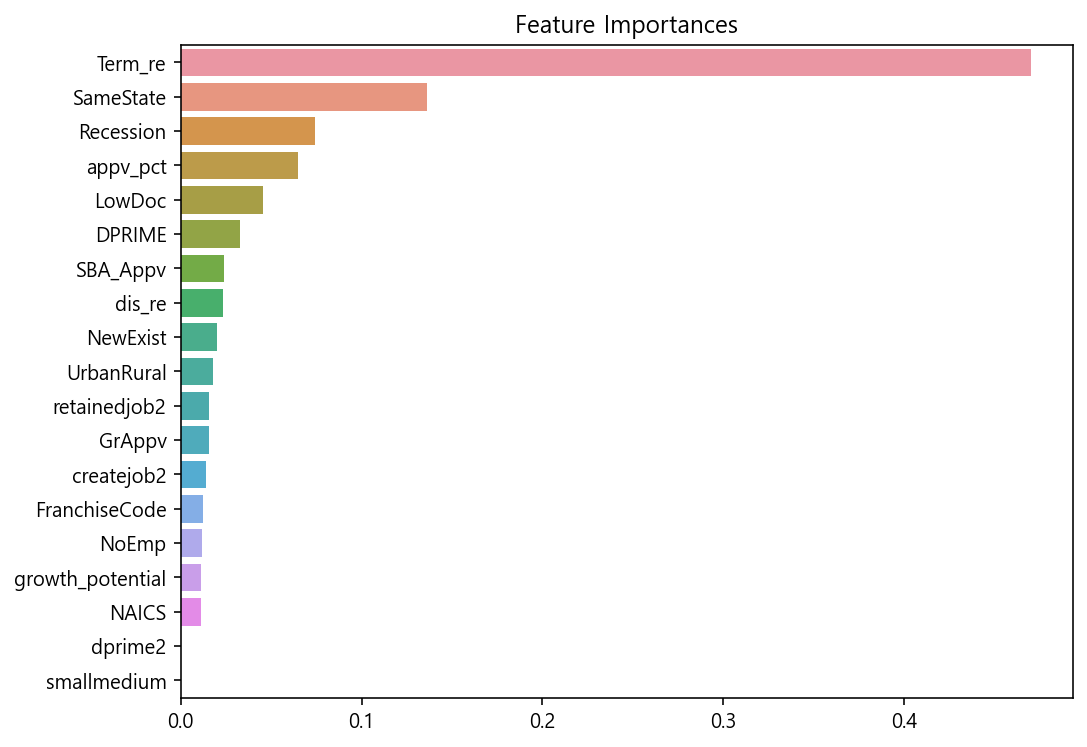

In [31]:
# 변수 중요도 계산

importances_values = pd.Series(xg_model.feature_importances_, index=x_valid.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

- 로지스틱 : 0.6727
- 랜덤 포레스트 : 0.7830
- SVM : 0.6705
- XGBoost : 0.7770